In [4]:
from IPython.display import Image
%matplotlib inline

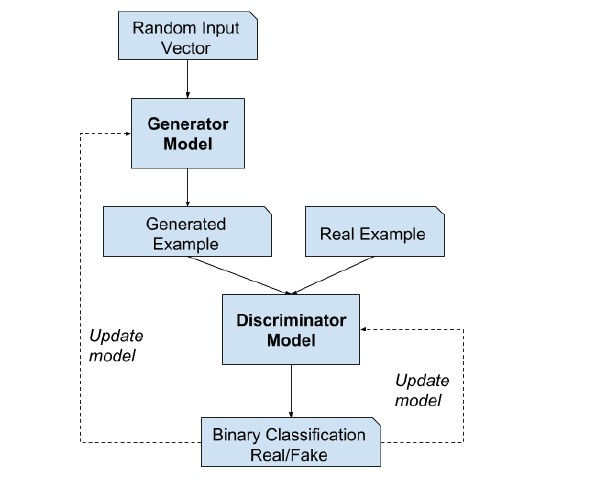

In [5]:
Image(filename='GAN.png',width=400)

# GAN:
    Generator
    
    Discriminator


# Generator:
    
1. Upsample - Doubles the input dimension:
     1.1 In order to generate an output images
        
2.Transpose the convolutional layer - inverse convolution operation:
     2.1 Both upsample input
        
     2.2 Learn hoe to fill in details during the model training process

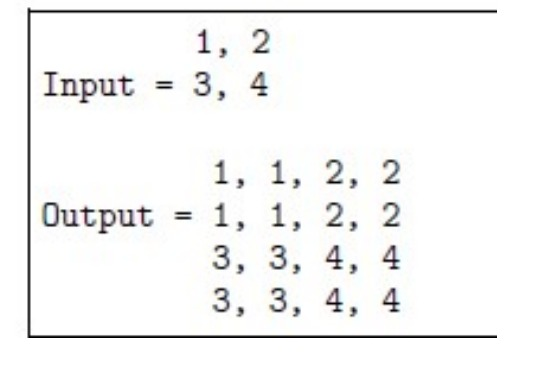

In [7]:
 Image(filename='upsample.jpeg',width=400)

# Upsample the layer

In [8]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import UpSampling2D
#define input
x=asarray([[1,2],[3,4]])
print('Input Array:\n',x)
print()
#reshape
x=x.reshape((1,2,2,1))
print('After Reshape:\n',x,x.shape)
 
#define model
model=Sequential()
model.add(UpSampling2D(input_shape=(2,2,1)))
 
#summarize the model
model.summary()
ypred=model.predict(x)
ypred=ypred.reshape((4,4))
print('Upsampled Array:\n',ypred)

Input Array:
 [[1 2]
 [3 4]]

After Reshape:
 [[[[1]
   [2]]

  [[3]
   [4]]]] (1, 2, 2, 1)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_2 (UpSamplin  (None, 4, 4, 1)           0         
 g2D)                                                            
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 384ms/step
Upsampled Array:
 [[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [3. 3. 4. 4.]
 [3. 3. 4. 4.]]


# sample model

In [9]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import UpSampling2D
from keras.layers import Dense,Conv2D,Reshape
 
model=Sequential()
model.add(Dense(128*5*5,input_dim=100))
model.add(Reshape((5,5,128)))
model.add(UpSampling2D())
model.add(Conv2D(1,(3,3),padding='same'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3200)              323200    
                                                                 
 reshape_1 (Reshape)         (None, 5, 5, 128)         0         
                                                                 
 up_sampling2d_3 (UpSamplin  (None, 10, 10, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 1)         1153      
                                                                 
Total params: 324353 (1.24 MB)
Trainable params: 324353 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 2. Transpose Convolutional Layer

In [10]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import UpSampling2D
from keras.layers import Conv2DTranspose
 
x=asarray([[1,2],[3,4]])
 
print('Input Array:\n',x)
print()
#reshape
x=x.reshape((1,2,2,1))
print('After Reshape:\n',x,x.shape)
 
#define model
model=Sequential()
model.add(Conv2DTranspose(1,(1,1),strides=(2,2),input_shape=(2,2,1)))
 
#summarize the model
model.summary()
weights=[asarray([[[[1]]]]),asarray([0])]
model.set_weights(weights)
 
 
ypred=model.predict(x)
 
ypred=ypred.reshape((4,4))
 
print('Transposed Array:\n',ypred)

Input Array:
 [[1 2]
 [3 4]]

After Reshape:
 [[[[1]
   [2]]

  [[3]
   [4]]]] (1, 2, 2, 1)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_1 (Conv2D  (None, 4, 4, 1)           2         
 Transpose)                                                      
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 281ms/step
Transposed Array:
 [[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [3. 0. 4. 0.]
 [0. 0. 0. 0.]]
